In [ ]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/Dacon/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/Dacon/test.csv')

In [ ]:
df

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [ ]:
df = df.dropna()
df

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [ ]:
# train = df.drop(['index'],axis = 1)
# test = test.drop(['index'],axis = 1)
# test = test.fillna(0)

In [ ]:
train = df.drop(['index', 'country'],axis = 1)
test = test.drop(['index', 'country'],axis = 1)
test = test.fillna(0)

In [ ]:
#train을 target과 feature로 나눠줍니다.
train_x = train.drop(['nerdiness'], axis=1)
train_y = train['nerdiness']

# Data split

In [ ]:
# 학습, 테스트 데이터 분리 (0.7:0.3)
seed = 2022
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.7, random_state=seed)

# split data에 대해 학습 진행

In [ ]:
df['country'].unique()

array(['USA', 'NLD', 'ITA', 'ARE', 'DNK', 'GRC', 'GBR', 'HUN', 'AUS',
       'POL', 'CAN', 'ARG', 'FRA', 'DEU', 'UKR', 'BGR', 'PHL', 'SVN',
       'SRB', 'NZL', 'SWE', 'MAR', 'IDN', 'HKG', 'LUX', 'CHE', 'MYS',
       'RUS', 'BRA', 'NOR', 'PRT', 'MEX', 'ROU', 'IND', 'VNM', 'AUT',
       'FIN', 'ESP', 'GUM', 'SGP', 'HND', 'KOR', 'CHL', 'COL', 'IRL',
       'CYP', 'BEL', 'IRQ', 'SVK', 'TUR', 'NGA', 'ZAF', 'JPN', 'ISR',
       'URY', 'ISL', 'GHA', 'CZE', 'KEN', 'ECU', 'PAK', 'EGY', 'JOR',
       'CRI', 'PER', 'NPL', 'SAU', 'MKD', 'THA', 'DOM', 'TTO', 'CUW',
       'BGD', 'LTU', 'PRI', 'HRV', 'IRN', 'GRL', 'SDN', 'LVA', 'ALB',
       'CHN', 'VEN', 'MUS', 'EST', 'LBN', 'TUN', 'BIH', 'QAT', 'PNG',
       'GUF', 'MDG', 'DZA', 'BRN', 'TWN', 'JAM', 'VGB', 'SLV', 'OMN',
       'PRY', 'LBY', 'AZE', 'KWT', 'BWA', 'FRO', 'BHR', 'ZMB', 'UGA',
       'NAM', 'KAZ', 'VIR', 'MLT', 'ARM', 'BHS', 'MAC', 'KHM', 'MNP',
       'SYR', 'MNG', 'MOZ', 'AFG', 'AGO', 'MWI', 'SSD', 'LAO', 'GEO',
       'PAN', 'BRB',

In [ ]:
ml_dt_clf = DecisionTreeClassifier(random_state=seed)
ml_dt_clf.fit(x_train, y_train) # 학습

ml_dt_clf_pred = ml_dt_clf.predict(x_test)

In [ ]:
# 학습결과 평가
print("Train_Accuracy : ", ml_dt_clf.score(x_train, y_train))
print("Test_Accuracy : ", ml_dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, ml_dt_clf_pred)
print("Accuracy :" ,mt.accuracy_score(y_test, ml_dt_clf_pred))

Train_Accuracy :  1.0
Test_Accuracy :  0.6514466546112115 

Accuracy : 0.6514466546112115


In [ ]:
# Pruning Phase 진행
pruned_dt_clf = DecisionTreeClassifier(max_depth=4, random_state=seed)
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: ", pruned_dt_clf.score(x_train, y_train))
print("Accuracy of test set: ", pruned_dt_clf.score(x_test, y_test))

Accuracy of training set:  0.7035083091532577
Accuracy of test set:  0.6903254972875226


최적의 depth 찾기

In [ ]:
# Find Optimal depth
def find_optimal_depth(DecisionTree, x_train, y_train):
    accuracy = []
    for i in range(1,DecisionTree.tree_.max_depth):
        pruning = DecisionTreeClassifier(max_depth=i, random_state=seed)
        pruning.fit(x_train, y_train)
        accuracy.append(pruning.score(x_test, y_test))
    print("최대 depth : ", accuracy.index(max(accuracy))+1)
    print("최대 Accuracy : " , max(accuracy))
    return accuracy.index(max(accuracy))+1

In [ ]:
optimal_depth = find_optimal_depth(ml_dt_clf, x_train, y_train)

최대 depth :  4
최대 Accuracy :  0.6903254972875226


In [ ]:
feature_names = x_train.columns.tolist()
feature_names = feature_names[:]
feature_names

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'introelapse',
 'testelapse',
 'surveyelapse',
 'TIPI1',
 'TIPI2',
 'TIPI3',
 'TIPI4',
 'TIPI5',
 'TIPI6',
 'TIPI7',
 'TIPI8',
 'TIPI9',
 'TIPI10',
 'VCL1',
 'VCL2',
 'VCL3',
 'VCL4',
 'VCL5',
 'VCL6',
 'VCL7',
 'VCL8',
 'VCL9',
 'VCL10',
 'VCL11',
 'VCL12',
 'VCL13',
 'VCL14',
 'VCL15',
 'VCL16',
 'education',
 'urban',
 'gender',
 'engnat',
 'age',
 'hand',
 'religion',
 'orientation',
 'voted',
 'married',
 'familysize',
 'ASD']

In [ ]:
target_names = df['nerdiness']
target_names = list(map(str,target_names.drop_duplicates()))
target_names

['1', '0']

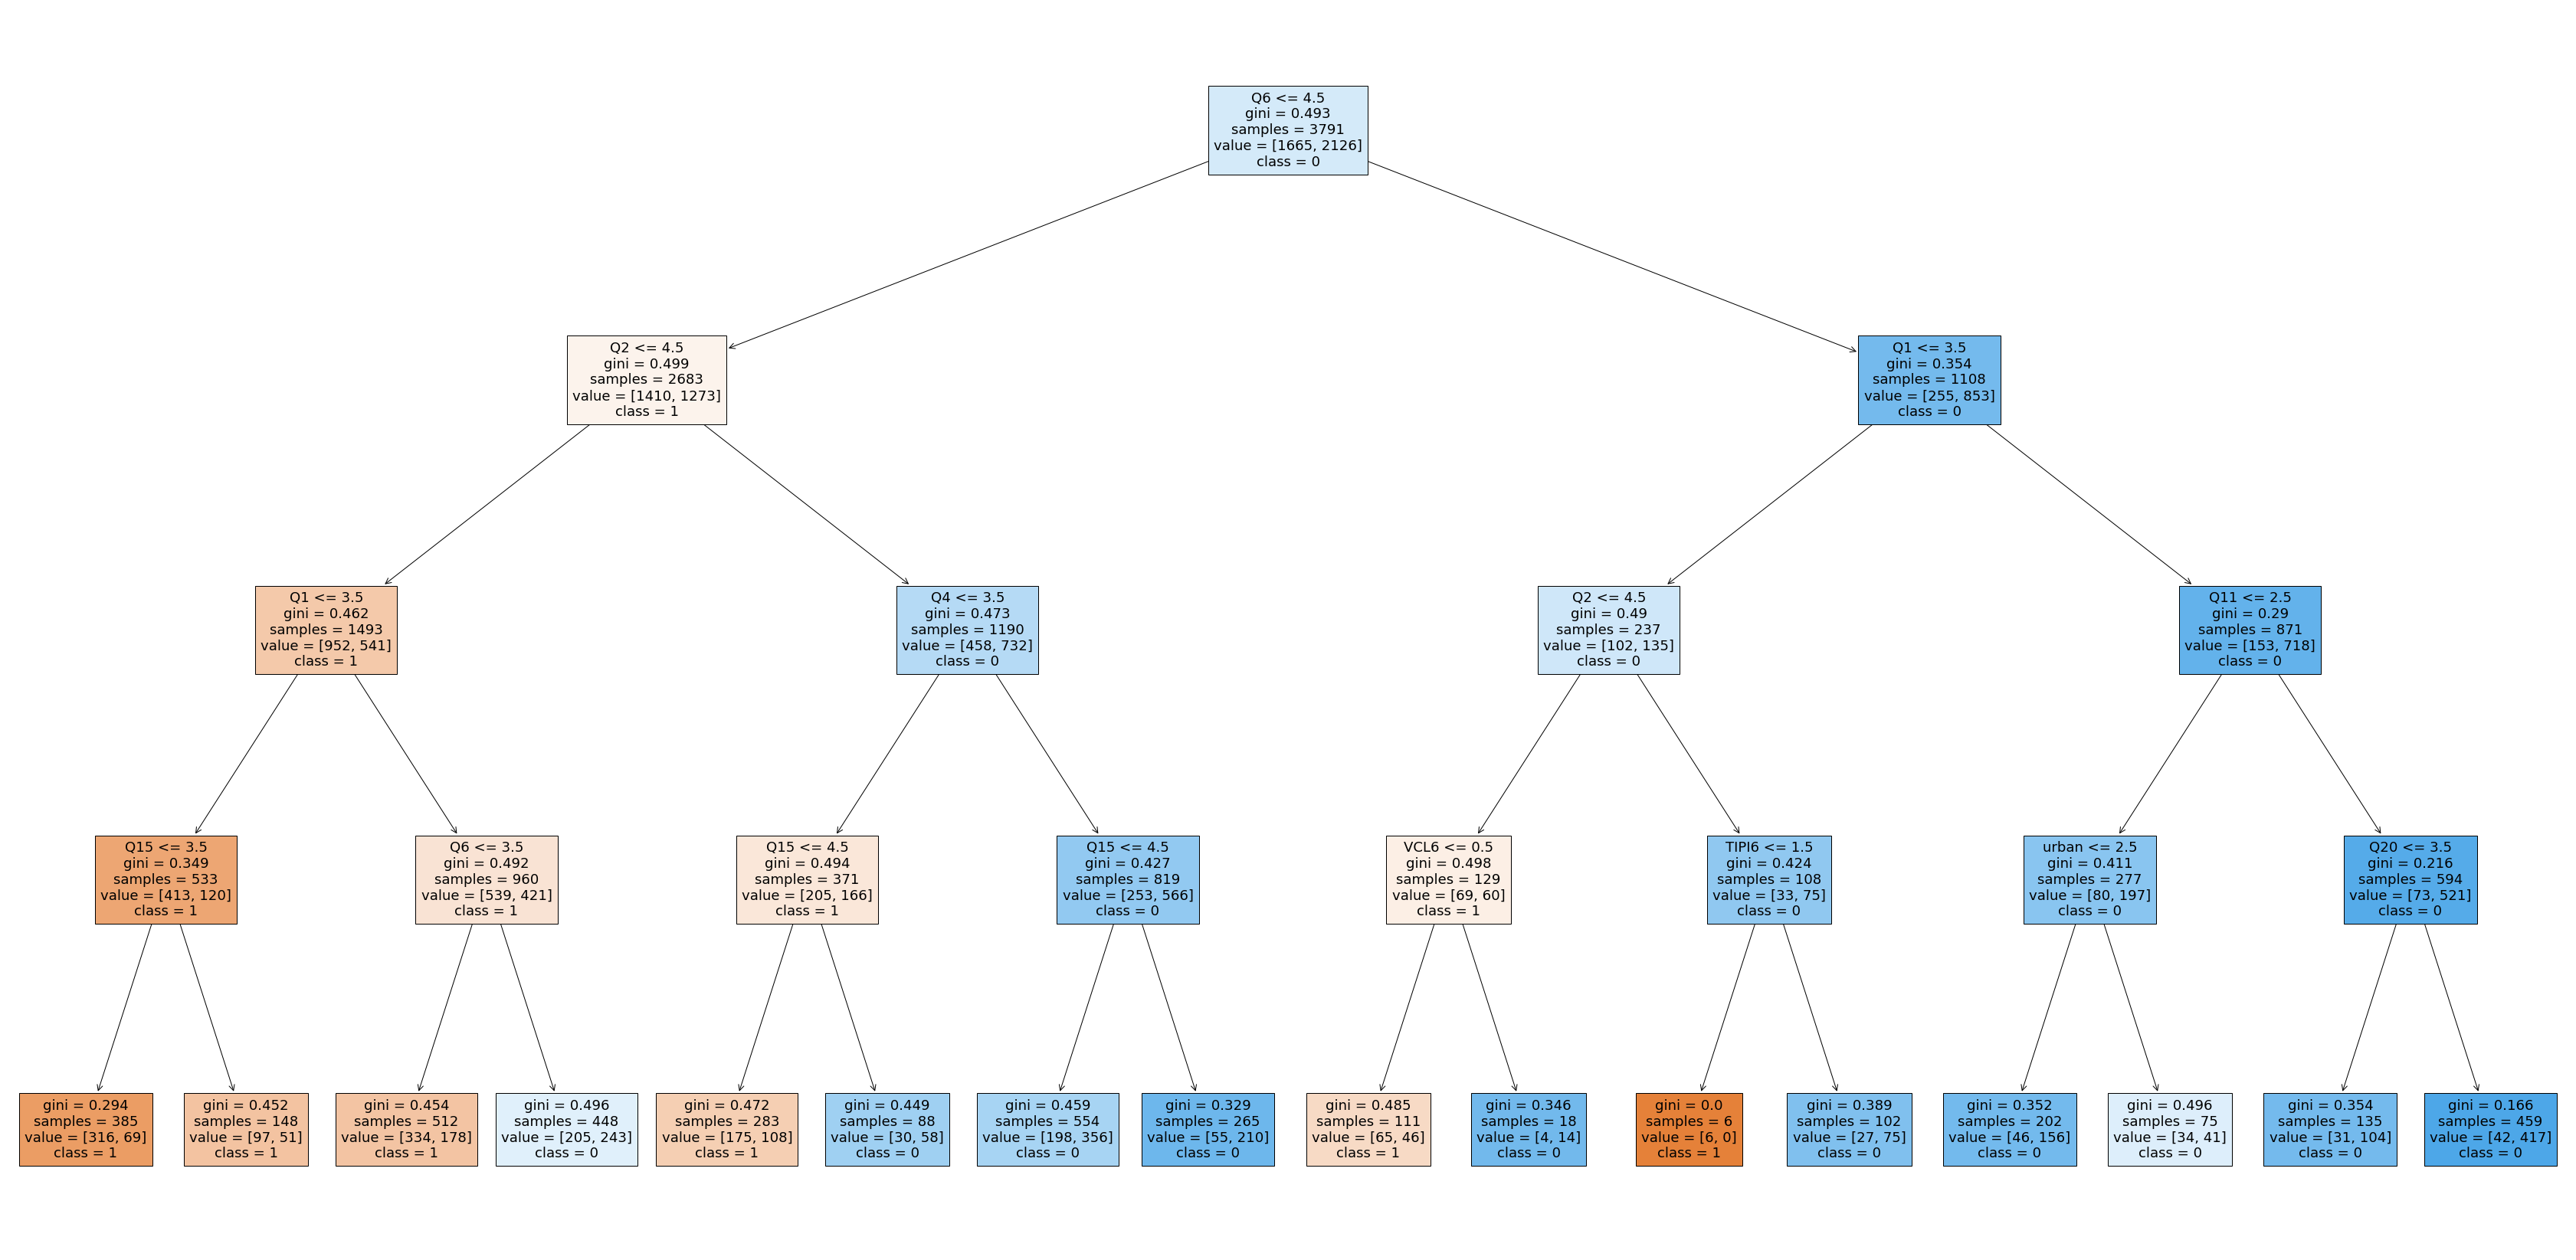

In [ ]:
# visualize with plot_tree
from sklearn.tree import plot_tree

plt.figure(figsize=(60,30))
plot_tree(pruned_dt_clf, feature_names = feature_names, class_names=target_names, filled=True);

In [ ]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(pruned_dt_clf, out_file="tree.dot", class_names = target_names, 
                feature_names = feature_names, impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


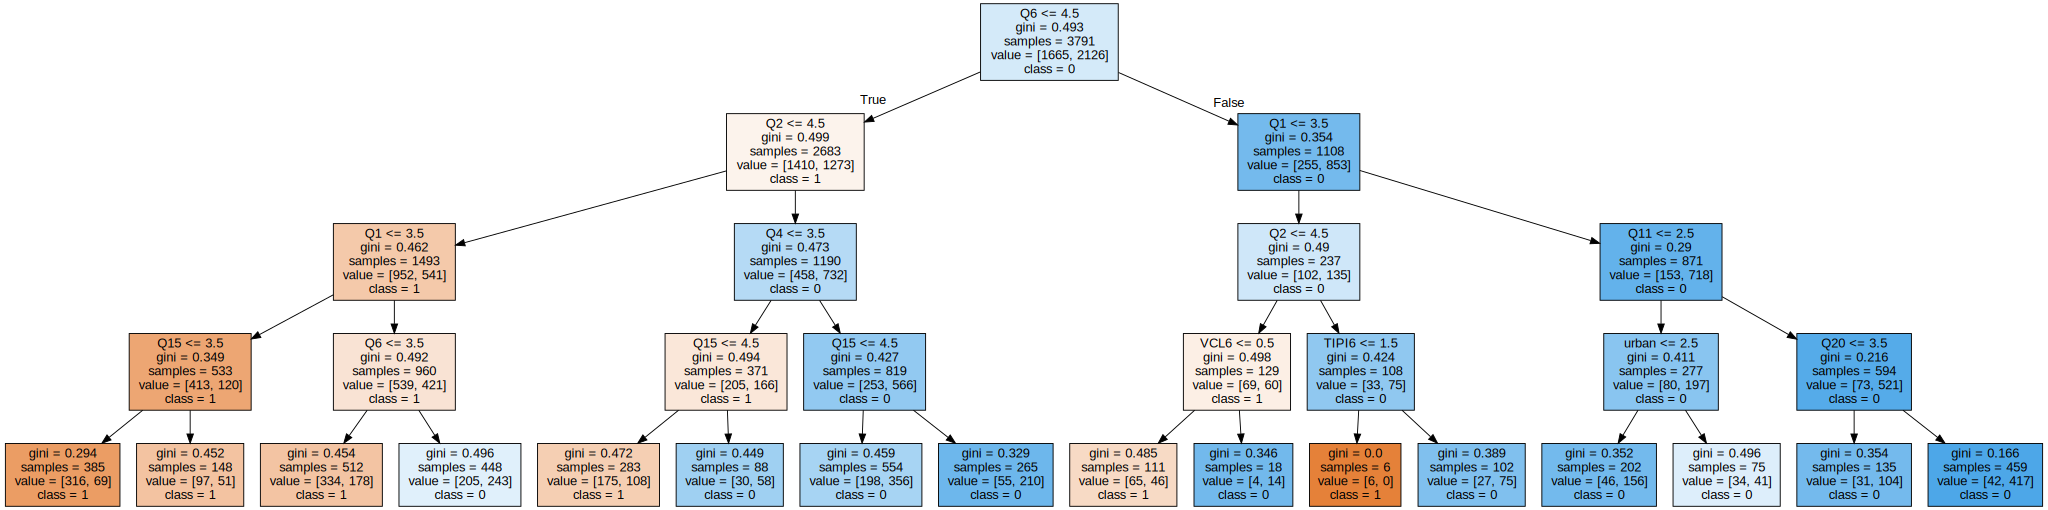

In [ ]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# submission 용 학습 진행  
- 결과가 좋진 않았음. 0.7정도 

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=seed)
dt_clf.fit(train_x, train_y) # 학습

DecisionTreeClassifier(random_state=2022)

In [ ]:
test.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,2.0,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,1.0,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,2.0,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,1.0,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,2.0,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0


In [ ]:
y_pred = dt_clf.predict(test)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Dacon/sample_submission.csv')
submission

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


In [ ]:
submission["nerdiness"] = y_pred
submission

,index,nerdiness
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35447,35447,1
35448,35448,1
35449,35449,1
35450,35450,0


In [ ]:
submission.to_csv("/content/drive/MyDrive/Dacon/08-06-DecisionTree.csv", index = False)